In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


In [18]:

# Load dataset
df = pd.read_csv("dataset.csv")  # Replace with your actual dataset path
X = df["sentence"]
y = df["label"]


Label distribution:
label
0    23094
1    23044
Name: count, dtype: int64


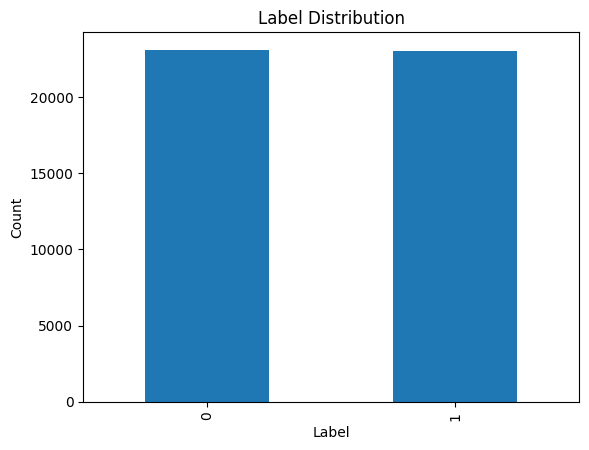

In [19]:

# Label distribution
print("Label distribution:")
print(y.value_counts())
y.value_counts().plot(kind='bar', title='Label Distribution')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [20]:
df.head()

,sentence,label
0,Photosynthesis is the process by which green p...,1
1,The capital of France is Paris.,1
2,Newton’s Second Law states that Force equals M...,1
3,Water boils at 100 degrees Celsius under stand...,1
4,DNA stands for Deoxyribonucleic Acid.,1


In [21]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:

# Text vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [23]:

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [24]:

# Predict
y_train_pred = model.predict(X_train_vec)
y_test_pred = model.predict(X_test_vec)


In [25]:

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")



Training Accuracy: 0.9995
Testing Accuracy: 0.9989


In [26]:

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4641
           1       1.00      1.00      1.00      4587

    accuracy                           1.00      9228
   macro avg       1.00      1.00      1.00      9228
weighted avg       1.00      1.00      1.00      9228



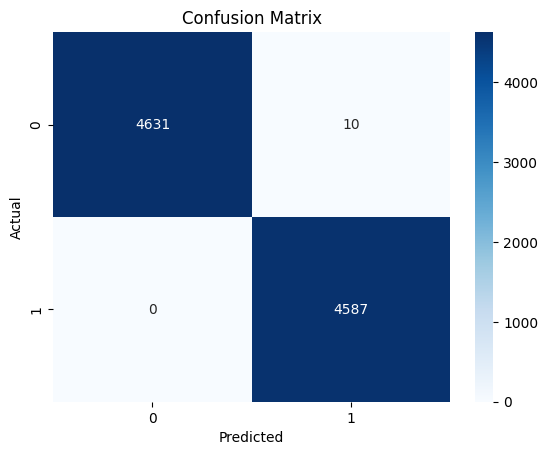

In [27]:

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:

# Top features for each class
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]  # For binary classification


In [29]:

top_n = 20
top_pos_idx = np.argsort(coefficients)[-top_n:]
top_neg_idx = np.argsort(coefficients)[:top_n]


In [30]:

print("\nTop features for class 1 (positive):")
for idx in reversed(top_pos_idx):
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

print("\nTop features for class 0 (negative):")
for idx in top_neg_idx:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")



Top features for class 1 (positive):
of: 4.8173
in: 4.5242
used: 3.4763
ir: 3.2725
the: 3.2524
formula: 3.2072
ma: 3.1622
light: 2.8149
refers to: 2.7706
refers: 2.7706
is: 2.7329
the formula: 2.6652
is used: 2.5687
involves: 2.3973
is defined: 2.3944
defined: 2.3944
defined as: 2.3944
an: 2.2518
is measured: 2.2156
measured: 2.2156

Top features for class 0 (negative):
lesson: -11.1471
this: -8.8390
you: -4.2346
next: -3.5073
presentation: -3.4464
will: -3.3452
topic: -3.1380
course: -3.0052
the course: -2.9064
welcome: -2.9064
welcome to: -2.9064
course on: -2.9064
was: -2.8257
first: -2.6648
how the: -2.6611
fun: -2.6500
discovered by: -2.6500
was first: -2.6500
first discovered: -2.6500
fun fact: -2.6500


In [31]:

# Save model and vectorizer
joblib.dump(model, "quiz_classifier_model.joblib")
joblib.dump(vectorizer, "vectorizer.joblib")


['vectorizer.joblib']